In [5]:
import pickle
import numpy as np

with open("/home/hyewon/cpon_vla/safety-gym/dataset_collect/safetygym_point/Safexp-CarPush2-v0/rollout_0013.pkl", "rb") as f:
    data = pickle.load(f)
    print(data["features"].shape)
    print(data["features"][0])

(1000, 88)
[-3.59286779e-02 -6.38960489e-01  4.28922643e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.51319248e-01  1.57697689e-01
  6.37844071e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  2.11836665e-01  3.13588258e-01  1.01751593e-01
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  3.69594959e-01  6.60829384e-01
  4.45799771e-01  4.55411120e-01  9.61134902e-03  0.00000000e+00
  0.00000000e+

Plot saved to: /home/hyewon/cpon_vla/safety-starter-agents/data/2026-02-02_runagent/2026-02-02_15-48-03-runagent_s0/progress_plot.png


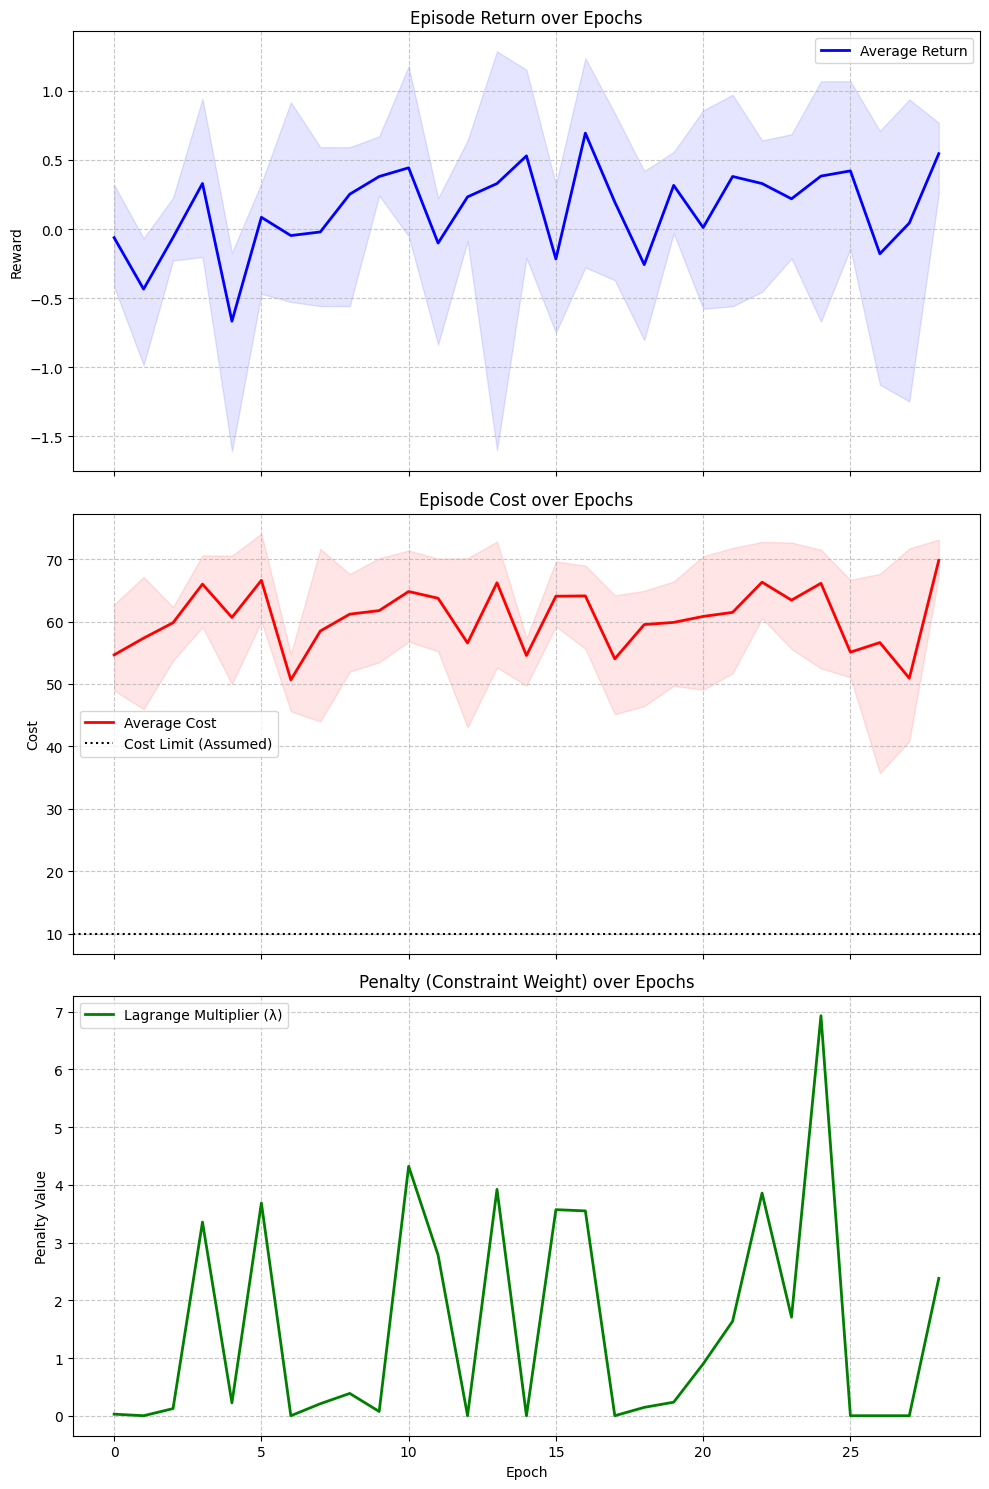

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def plot_training_results(file_path):
    if not os.path.exists(file_path):
        print(f"Error: File not found at {file_path}")
        return

    df = pd.read_csv(file_path, sep='\t')

    fig, axs = plt.subplots(3, 1, figsize=(10, 15), sharex=True)
    
    epochs = df['Epoch']

    # 1. Episode Return (보상)
    axs[0].plot(epochs, df['AverageEpRet'], label='Average Return', color='blue', linewidth=2)
    if 'MaxEpRet' in df.columns and 'MinEpRet' in df.columns:
        axs[0].fill_between(epochs, df['MinEpRet'], df['MaxEpRet'], color='blue', alpha=0.1)
    axs[0].set_ylabel('Reward')
    axs[0].set_title('Episode Return over Epochs')
    axs[0].legend()
    axs[0].grid(True, linestyle='--', alpha=0.7)

    axs[1].plot(epochs, df['AverageEpCost'], label='Average Cost', color='red', linewidth=2)
    if 'MaxEpCost' in df.columns and 'MinEpCost' in df.columns:
        axs[1].fill_between(epochs, df['MinEpCost'], df['MaxEpCost'], color='red', alpha=0.1)

    axs[1].axhline(y=10, color='black', linestyle=':', label='Cost Limit (Assumed)') 
    
    axs[1].set_ylabel('Cost')
    axs[1].set_title('Episode Cost over Epochs')
    axs[1].legend()
    axs[1].grid(True, linestyle='--', alpha=0.7)

    if 'Penalty' in df.columns:
        axs[2].plot(epochs, df['Penalty'], label='Lagrange Multiplier (λ)', color='green', linewidth=2)
        axs[2].set_ylabel('Penalty Value')
        axs[2].set_title('Penalty (Constraint Weight) over Epochs')
        axs[2].legend()
        axs[2].grid(True, linestyle='--', alpha=0.7)

    axs[2].set_xlabel('Epoch')

    plt.tight_layout()
    
    save_path = file_path.replace('.txt', '_plot.png')
    plt.savefig(save_path)
    print(f"Plot saved to: {save_path}")
    plt.show()

if __name__ == "__main__":
    path = "/home/hyewon/cpon_vla/safety-starter-agents/data/2026-02-02_runagent/2026-02-02_15-48-03-runagent_s0/progress.txt" 
    plot_training_results(path)